In [36]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

def load_data(DIR):
    data = []
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            #Load Image
            img = np.array(Image.open(path))
            # Flatten 60x64 image into 3840 vector
            img = img.flatten()
            # Normalize values between 0 and 1
            maxVal = np.max(img)
            minVal = np.min(img)
            for i in range(len(img)):
                img[i] = (img[i] - minVal) / (maxVal - minVal)
            # Assign Label
            if "left" in path:
                label = np.array([1, 0, 0]) # one hot encoding labels
            elif "right" in path:
                label = np.array([0, 1, 0]) # one hot encoding labels
            else:
                label = np.array([0, 0, 1]) # one hot encoding labels
            data.append([np.array(img), label])
    shuffle(data)
    return data
    

In [37]:
faceData = load_data('./faces_up')

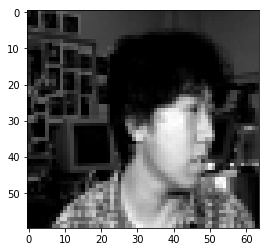

In [40]:
# Visualize Left Image
LeftImage = np.array(Image.open('./faces_up/left1.pgm'))
plt.imshow(LeftImage, cmap = 'gist_gray')

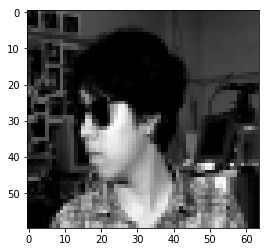

In [41]:
# Visualize Right Image
# Visualize Left Image
RightImage = np.array(Image.open('./faces_up/right1.pgm'))
plt.imshow(RightImage, cmap = 'gist_gray')

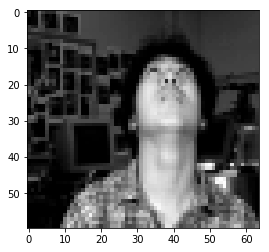

In [42]:
# Visualize Up Image
# Visualize Left Image
UpImage = np.array(Image.open('./faces_up/up1.pgm'))
plt.imshow(UpImage, cmap = 'gist_gray')

In [3]:
# 60% of 150 = 90
train = faceData[:90]
test = faceData[:-90]

trainX = np.array([i[0] for i in train]).reshape(-1, 3840)
trainY = np.array([i[1] for i in train])

type(trainY)
trainY.shape

(90, 3)

In [4]:
# Import Keras Dependencies
from keras.models import Sequential
from keras.layers import Dense

/Users/connorshorten1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# Model - 1 Hidden Layer (9 Nodes), 1 Output Layer (3 Nodes)
model = Sequential()
model.add(Dense(9, input_dim=3840, activation = 'sigmoid'))
model.add(Dense(3, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs = 1000, batch_size = 30)

Epoch 1/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.6686 - acc: 0.6556
Epoch 2/1000
90/90 [==============================] - 0s 64us/step - loss: 0.6656 - acc: 0.6667
Epoch 3/1000
90/90 [==============================] - 0s 65us/step - loss: 0.6626 - acc: 0.6630
Epoch 4/1000
90/90 [==============================] - 0s 59us/step - loss: 0.6597 - acc: 0.6667
Epoch 5/1000
90/90 [==============================] - 0s 71us/step - loss: 0.6569 - acc: 0.6667
Epoch 6/1000
90/90 [==============================] - 0s 61us/step - loss: 0.6542 - acc: 0.6667
Epoch 7/1000
90/90 [==============================] - 0s 70us/step - loss: 0.6516 - acc: 0.6667
Epoch 8/1000
90/90 [==============================] - 0s 76us/step - loss: 0.6491 - acc: 0.6667
Epoch 9/1000
90/90 [==============================] - 0s 54us/step - loss: 0.6466 - acc: 0.6667
Epoch 10/1000
90/90 [==============================] - 0s 61us/step - loss: 0.6443 - acc: 0.6667
Epoch 11/1000
90/90 [===================

90/90 [==============================] - 0s 53us/step - loss: 0.5525 - acc: 0.7111
Epoch 86/1000
90/90 [==============================] - 0s 52us/step - loss: 0.5513 - acc: 0.7111
Epoch 87/1000
90/90 [==============================] - 0s 53us/step - loss: 0.5504 - acc: 0.7148
Epoch 88/1000
90/90 [==============================] - 0s 52us/step - loss: 0.5492 - acc: 0.7148
Epoch 89/1000
90/90 [==============================] - 0s 58us/step - loss: 0.5482 - acc: 0.7185
Epoch 90/1000
90/90 [==============================] - 0s 58us/step - loss: 0.5471 - acc: 0.7185
Epoch 91/1000
90/90 [==============================] - 0s 65us/step - loss: 0.5461 - acc: 0.7185
Epoch 92/1000
90/90 [==============================] - 0s 66us/step - loss: 0.5449 - acc: 0.7185
Epoch 93/1000
90/90 [==============================] - 0s 56us/step - loss: 0.5439 - acc: 0.7185
Epoch 94/1000
90/90 [==============================] - 0s 68us/step - loss: 0.5428 - acc: 0.7185
Epoch 95/1000
90/90 [=======================

90/90 [==============================] - 0s 54us/step - loss: 0.4562 - acc: 0.7852
Epoch 169/1000
90/90 [==============================] - 0s 60us/step - loss: 0.4550 - acc: 0.7852
Epoch 170/1000
90/90 [==============================] - 0s 57us/step - loss: 0.4538 - acc: 0.7852
Epoch 171/1000
90/90 [==============================] - 0s 64us/step - loss: 0.4526 - acc: 0.7889
Epoch 172/1000
90/90 [==============================] - 0s 60us/step - loss: 0.4514 - acc: 0.7926
Epoch 173/1000
90/90 [==============================] - 0s 55us/step - loss: 0.4501 - acc: 0.7926
Epoch 174/1000
90/90 [==============================] - 0s 64us/step - loss: 0.4489 - acc: 0.7926
Epoch 175/1000
90/90 [==============================] - 0s 57us/step - loss: 0.4477 - acc: 0.7926
Epoch 176/1000
90/90 [==============================] - 0s 55us/step - loss: 0.4465 - acc: 0.7926
Epoch 177/1000
90/90 [==============================] - 0s 61us/step - loss: 0.4453 - acc: 0.7926
Epoch 178/1000
90/90 [=============

90/90 [==============================] - 0s 61us/step - loss: 0.3600 - acc: 0.8593
Epoch 252/1000
90/90 [==============================] - 0s 53us/step - loss: 0.3590 - acc: 0.8630
Epoch 253/1000
90/90 [==============================] - 0s 61us/step - loss: 0.3579 - acc: 0.8704
Epoch 254/1000
90/90 [==============================] - 0s 55us/step - loss: 0.3569 - acc: 0.8704
Epoch 255/1000
90/90 [==============================] - 0s 65us/step - loss: 0.3558 - acc: 0.8704
Epoch 256/1000
90/90 [==============================] - 0s 60us/step - loss: 0.3548 - acc: 0.8704
Epoch 257/1000
90/90 [==============================] - 0s 58us/step - loss: 0.3537 - acc: 0.8741
Epoch 258/1000
90/90 [==============================] - 0s 54us/step - loss: 0.3527 - acc: 0.8815
Epoch 259/1000
90/90 [==============================] - 0s 56us/step - loss: 0.3516 - acc: 0.8815
Epoch 260/1000
90/90 [==============================] - 0s 53us/step - loss: 0.3506 - acc: 0.8815
Epoch 261/1000
90/90 [=============

90/90 [==============================] - 0s 64us/step - loss: 0.2826 - acc: 0.9333
Epoch 335/1000
90/90 [==============================] - 0s 56us/step - loss: 0.2818 - acc: 0.9333
Epoch 336/1000
90/90 [==============================] - 0s 80us/step - loss: 0.2810 - acc: 0.9333
Epoch 337/1000
90/90 [==============================] - 0s 60us/step - loss: 0.2802 - acc: 0.9333
Epoch 338/1000
90/90 [==============================] - 0s 68us/step - loss: 0.2794 - acc: 0.9333
Epoch 339/1000
90/90 [==============================] - 0s 69us/step - loss: 0.2786 - acc: 0.9333
Epoch 340/1000
90/90 [==============================] - 0s 57us/step - loss: 0.2778 - acc: 0.9333
Epoch 341/1000
90/90 [==============================] - 0s 71us/step - loss: 0.2771 - acc: 0.9333
Epoch 342/1000
90/90 [==============================] - 0s 54us/step - loss: 0.2763 - acc: 0.9333
Epoch 343/1000
90/90 [==============================] - 0s 57us/step - loss: 0.2755 - acc: 0.9370
Epoch 344/1000
90/90 [=============

90/90 [==============================] - 0s 55us/step - loss: 0.2258 - acc: 0.9481
Epoch 418/1000
90/90 [==============================] - 0s 66us/step - loss: 0.2252 - acc: 0.9481
Epoch 419/1000
90/90 [==============================] - 0s 79us/step - loss: 0.2247 - acc: 0.9481
Epoch 420/1000
90/90 [==============================] - 0s 69us/step - loss: 0.2241 - acc: 0.9481
Epoch 421/1000
90/90 [==============================] - 0s 89us/step - loss: 0.2236 - acc: 0.9481
Epoch 422/1000
90/90 [==============================] - 0s 57us/step - loss: 0.2230 - acc: 0.9481
Epoch 423/1000
90/90 [==============================] - 0s 57us/step - loss: 0.2224 - acc: 0.9481
Epoch 424/1000
90/90 [==============================] - 0s 50us/step - loss: 0.2218 - acc: 0.9481
Epoch 425/1000
90/90 [==============================] - 0s 54us/step - loss: 0.2213 - acc: 0.9444
Epoch 426/1000
90/90 [==============================] - 0s 97us/step - loss: 0.2207 - acc: 0.9481
Epoch 427/1000
90/90 [=============

90/90 [==============================] - 0s 56us/step - loss: 0.1851 - acc: 0.9556
Epoch 501/1000
90/90 [==============================] - 0s 58us/step - loss: 0.1847 - acc: 0.9556
Epoch 502/1000
90/90 [==============================] - 0s 58us/step - loss: 0.1843 - acc: 0.9556
Epoch 503/1000
90/90 [==============================] - 0s 54us/step - loss: 0.1839 - acc: 0.9556
Epoch 504/1000
90/90 [==============================] - 0s 66us/step - loss: 0.1835 - acc: 0.9556
Epoch 505/1000
90/90 [==============================] - 0s 65us/step - loss: 0.1830 - acc: 0.9556
Epoch 506/1000
90/90 [==============================] - 0s 58us/step - loss: 0.1826 - acc: 0.9556
Epoch 507/1000
90/90 [==============================] - 0s 57us/step - loss: 0.1822 - acc: 0.9556
Epoch 508/1000
90/90 [==============================] - 0s 57us/step - loss: 0.1818 - acc: 0.9556
Epoch 509/1000
90/90 [==============================] - 0s 64us/step - loss: 0.1814 - acc: 0.9556
Epoch 510/1000
90/90 [=============

90/90 [==============================] - 0s 73us/step - loss: 0.1557 - acc: 0.9556
Epoch 584/1000
90/90 [==============================] - 0s 61us/step - loss: 0.1554 - acc: 0.9556
Epoch 585/1000
90/90 [==============================] - 0s 67us/step - loss: 0.1551 - acc: 0.9556
Epoch 586/1000
90/90 [==============================] - 0s 69us/step - loss: 0.1548 - acc: 0.9556
Epoch 587/1000
90/90 [==============================] - 0s 69us/step - loss: 0.1545 - acc: 0.9556
Epoch 588/1000
90/90 [==============================] - 0s 65us/step - loss: 0.1542 - acc: 0.9556
Epoch 589/1000
90/90 [==============================] - 0s 68us/step - loss: 0.1539 - acc: 0.9556
Epoch 590/1000
90/90 [==============================] - 0s 71us/step - loss: 0.1536 - acc: 0.9556
Epoch 591/1000
90/90 [==============================] - 0s 90us/step - loss: 0.1533 - acc: 0.9556
Epoch 592/1000
90/90 [==============================] - 0s 68us/step - loss: 0.1530 - acc: 0.9556
Epoch 593/1000
90/90 [=============

90/90 [==============================] - 0s 82us/step - loss: 0.1342 - acc: 0.9556
Epoch 667/1000
90/90 [==============================] - 0s 78us/step - loss: 0.1340 - acc: 0.9556
Epoch 668/1000
90/90 [==============================] - 0s 76us/step - loss: 0.1337 - acc: 0.9593
Epoch 669/1000
90/90 [==============================] - 0s 75us/step - loss: 0.1335 - acc: 0.9593
Epoch 670/1000
90/90 [==============================] - 0s 65us/step - loss: 0.1333 - acc: 0.9593
Epoch 671/1000
90/90 [==============================] - 0s 65us/step - loss: 0.1331 - acc: 0.9593
Epoch 672/1000
90/90 [==============================] - 0s 64us/step - loss: 0.1329 - acc: 0.9593
Epoch 673/1000
90/90 [==============================] - 0s 56us/step - loss: 0.1326 - acc: 0.9593
Epoch 674/1000
90/90 [==============================] - 0s 85us/step - loss: 0.1324 - acc: 0.9593
Epoch 675/1000
90/90 [==============================] - 0s 81us/step - loss: 0.1322 - acc: 0.9593
Epoch 676/1000
90/90 [=============

90/90 [==============================] - 0s 55us/step - loss: 0.1181 - acc: 0.9630
Epoch 750/1000
90/90 [==============================] - 0s 55us/step - loss: 0.1180 - acc: 0.9630
Epoch 751/1000
90/90 [==============================] - 0s 59us/step - loss: 0.1178 - acc: 0.9630
Epoch 752/1000
90/90 [==============================] - 0s 54us/step - loss: 0.1176 - acc: 0.9630
Epoch 753/1000
90/90 [==============================] - 0s 54us/step - loss: 0.1175 - acc: 0.9630
Epoch 754/1000
90/90 [==============================] - 0s 66us/step - loss: 0.1173 - acc: 0.9630
Epoch 755/1000
90/90 [==============================] - 0s 56us/step - loss: 0.1171 - acc: 0.9630
Epoch 756/1000
90/90 [==============================] - 0s 69us/step - loss: 0.1170 - acc: 0.9630
Epoch 757/1000
90/90 [==============================] - 0s 54us/step - loss: 0.1168 - acc: 0.9630
Epoch 758/1000
90/90 [==============================] - 0s 56us/step - loss: 0.1166 - acc: 0.9630
Epoch 759/1000
90/90 [=============

90/90 [==============================] - 0s 69us/step - loss: 0.1060 - acc: 0.9630
Epoch 833/1000
90/90 [==============================] - 0s 55us/step - loss: 0.1059 - acc: 0.9630
Epoch 834/1000
90/90 [==============================] - 0s 86us/step - loss: 0.1057 - acc: 0.9630
Epoch 835/1000
90/90 [==============================] - 0s 65us/step - loss: 0.1056 - acc: 0.9630
Epoch 836/1000
90/90 [==============================] - 0s 93us/step - loss: 0.1055 - acc: 0.9630
Epoch 837/1000
90/90 [==============================] - 0s 73us/step - loss: 0.1053 - acc: 0.9630
Epoch 838/1000
90/90 [==============================] - 0s 69us/step - loss: 0.1052 - acc: 0.9630
Epoch 839/1000
90/90 [==============================] - 0s 85us/step - loss: 0.1051 - acc: 0.9630
Epoch 840/1000
90/90 [==============================] - 0s 69us/step - loss: 0.1050 - acc: 0.9630
Epoch 841/1000
90/90 [==============================] - 0s 80us/step - loss: 0.1049 - acc: 0.9630
Epoch 842/1000
90/90 [=============

90/90 [==============================] - 0s 57us/step - loss: 0.0967 - acc: 0.9630
Epoch 916/1000
90/90 [==============================] - 0s 67us/step - loss: 0.0966 - acc: 0.9630
Epoch 917/1000
90/90 [==============================] - 0s 73us/step - loss: 0.0965 - acc: 0.9630
Epoch 918/1000
90/90 [==============================] - 0s 74us/step - loss: 0.0964 - acc: 0.9630
Epoch 919/1000
90/90 [==============================] - 0s 67us/step - loss: 0.0963 - acc: 0.9630
Epoch 920/1000
90/90 [==============================] - 0s 64us/step - loss: 0.0962 - acc: 0.9630
Epoch 921/1000
90/90 [==============================] - 0s 64us/step - loss: 0.0961 - acc: 0.9630
Epoch 922/1000
90/90 [==============================] - 0s 62us/step - loss: 0.0960 - acc: 0.9630
Epoch 923/1000
90/90 [==============================] - 0s 58us/step - loss: 0.0959 - acc: 0.9630
Epoch 924/1000
90/90 [==============================] - 0s 80us/step - loss: 0.0958 - acc: 0.9630
Epoch 925/1000
90/90 [=============

90/90 [==============================] - 0s 52us/step - loss: 0.0894 - acc: 0.9630
Epoch 999/1000
90/90 [==============================] - 0s 56us/step - loss: 0.0893 - acc: 0.9630
Epoch 1000/1000
90/90 [==============================] - 0s 64us/step - loss: 0.0893 - acc: 0.9630


In [27]:
testImages = np.array([i[0] for i in test]).reshape(-1, 3840)
testLabels = [i[1] for i in test]

correct = 0
for i in range(len(testImages)):
    newTest = testImages[i]
    newTest = newTest.reshape((1,3840))
    prediction = model.predict(newTest)
    out = np.argmax(prediction)
    correctLabel = np.argmax(testLabels[i])
    if (out == correctLabel):
        correct += 1

print(correct / len(testImages) * 100)

95.0
